https://codetorial.net/tensorflow/convolutional_neural_network.html

10. 합성곱 신경망 사용

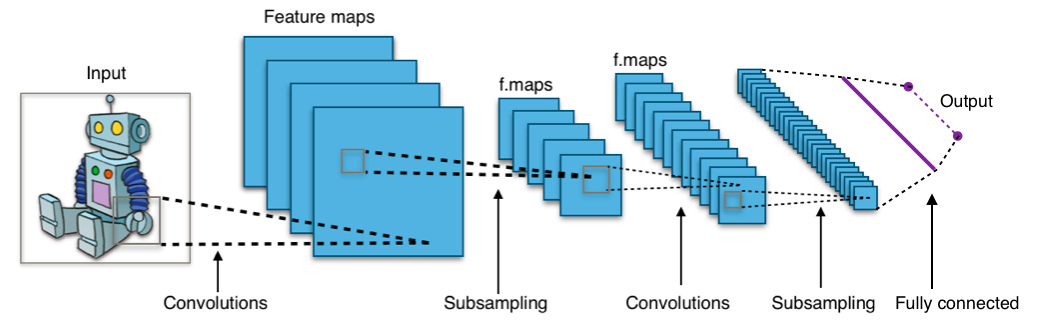

합성곱 신경망 (Convolutional neural network, CNN)은 시각적 이미지 분석 및 분류에 가장 일반적으로 사용되는 인공신경망입니다.

이번 페이지에서는 합성곱 신경망을 사용해서 MNIST 이미지 데이터셋을 분류해보겠습니다.

순서는 아래와 같습니다.

1. MNIST 데이터셋 불러오기

2. 데이터 전처리하기

3. 합성곱 신경망 구성하기

4. Dense 층 추가하기

5. 모델 컴파일하기

6. 훈련하기

7. 모델 평가하기

In [8]:
# 1. MNIST 데이터셋 불러오기
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [9]:
# 2. 데이터 전처리하기
# mnist 데이터셋의 자료형을 출력해보면 numpy.ndarray 클래스로 확인됨
# NumPy의 reshape() 함수를 이용해서 적절한 형태로 변환해야 함.
# 28, 28 형태로 변형하여 input
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 0~255 사이의 값을 갖는 데이터를 0.0~1.0 사이의 값
train_images, test_images = train_images / 255.0, test_images / 255.0

tf.keras.models 모듈의 Sequential 클래스를 사용해서 인공신경망의 각 층을 순서대로 쌓을 수 있습니다.

add() 메서드를 이용해서 합성곱 층 Conv2D와 Max pooling 층 MaxPooling2D를 반복해서 구성합니다.


첫번째 Conv2D 층의 첫번째 인자 32는 filters 값입니다.

합성곱 연산에서 사용되는 필터 (filter)는 이미지에서 특징 (feature)을 분리해내는 기능을 합니다.

filters의 값은 합성곱에 사용되는 필터의 종류 (개수)이며, 출력 공간의 차원 (깊이)을 결정합니다.


두번째 인자 (3, 3)은 kernel_size 값입니다.

kernel_size는 합성곱에 사용되는 필터 (=커널)의 크기입니다.

아래와 같은 3×3 크기의 필터가 사용되며, 합성곱 연산이 이루어지고 나면 이미지는 (28, 28) 크기에서 (26, 26)이 됩니다.
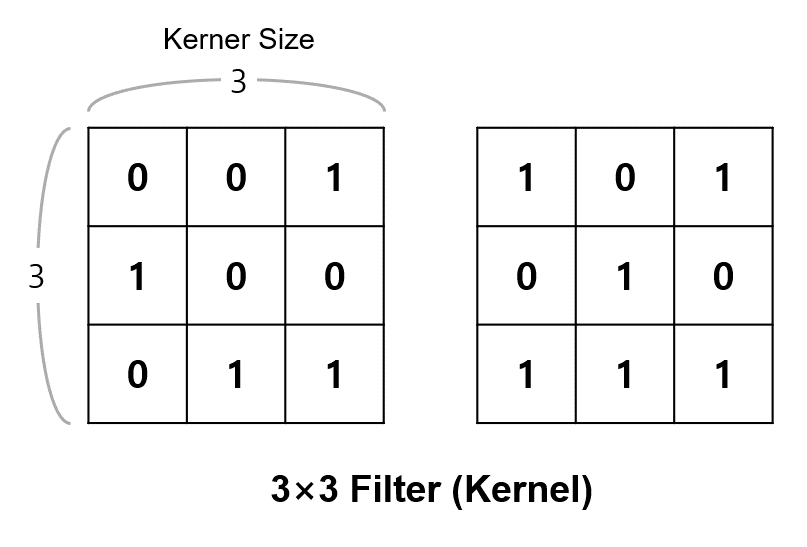

In [10]:
# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

활성화함수 (Activation function)는 ‘relu’로 지정하고,

입력 데이터의 형태 (input_shape)는 아래와 같이 MNIST 숫자 이미지 하나의 형태에 해당하는 (28, 28, 1)로 설정합니다.

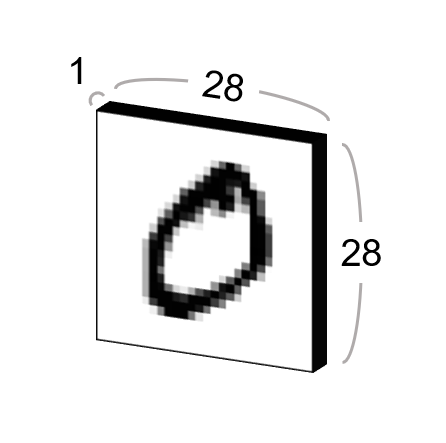

풀링 (Pooling)은 합성곱에 의해 얻어진 Feature map으로부터 값을 샘플링해서 정보를 압축하는 과정을 의미합니다.

맥스풀링 (Max-pooling)은 특정 영역에서 가장 큰 값을 샘플링하는 풀링 방식이며,

예제에서는 풀링 필터의 크기를 2×2 영역으로 설정했습니다.


strides는 풀링 필터를 이동시키는 간격을 의미합니다.

strides를 지정해주지 않으면 (None), 풀링 필터의 크기와 같아서 영역의 오버랩 없이 풀링이 이루어집니다.

따라서 풀링이 이루어지고 나면, (26, 26) 크기의 이미지는 (13, 13) 크기가 됩니다.

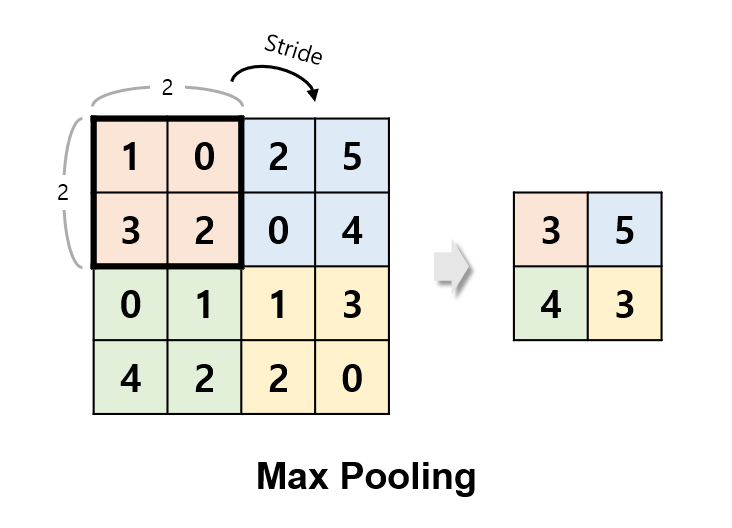

지금까지 구성한 신경망의 구조를 그림으로 나타내면 아래와 같습니다.

이러한 합성곱, 풀링 층은 특성 추출 (Feature Extraction)을 담당하며, 전체 합성곱 신경망의 앞부분을 구성합니다.

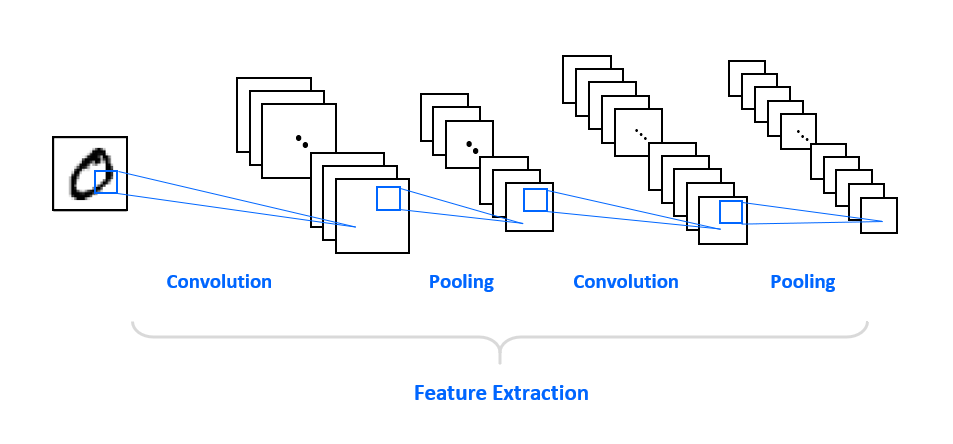

In [11]:
# 4. Dense 층 추가하기
# 합성곱 층에 이어 뒷부분에는 분류를 담당하는 Dense 층 (Fully-connected layer)을 세 개 추가합니다.
# 마지막 출력층 노드의 개수는 열 개로 하고 ‘softmax’ 활성화함수를 사용합니다.
# summary() 메서드를 이용해서 지금까지 구성한 신경망에 대한 정보를 다시 출력

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

flatten, dense, dense_1 이라는 세 개의 층이 추가되고,

훈련 가능한 파라미터의 수가 55,744개에서 60,554개로 증가했습니다.

지금까지 구성한 전체 신경망의 구조를 그림으로 나타내면 아래와 같습니다.

여러 층의 합성곱, 풀링층과 Dense 층이 반복적으로 구성되었습니다.

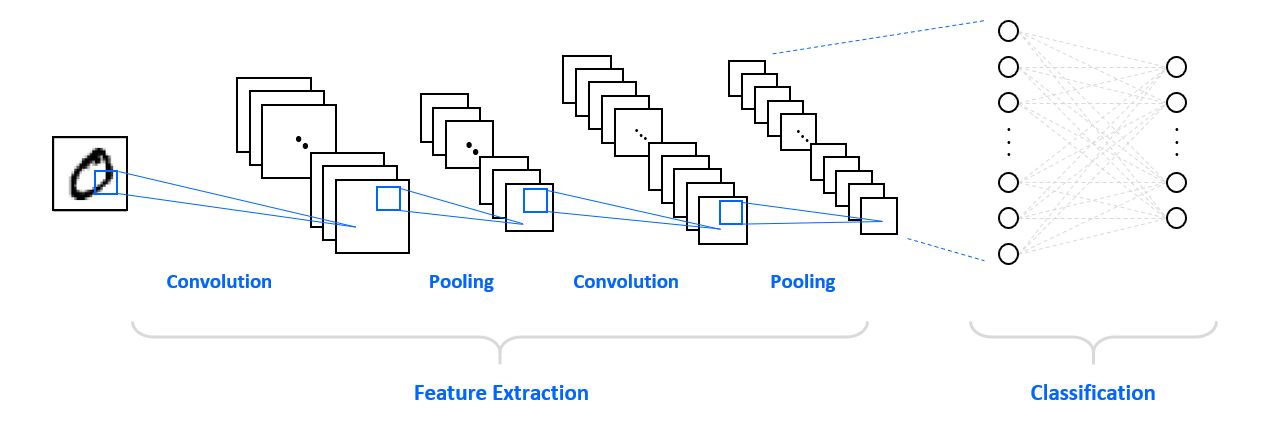

In [13]:
# 이 코드는 앞에서 설명한 합성곱 신경망과 Dense 층을 구성하는 또 다른 방식을 보여줍니다.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        

In [14]:
# 5. 모델 컴파일하기
# 앞의 예제와 마찬가지로 compile() 메서드를 이용해서 옵티마이저, 손실 함수, 지표를 각각 설정해줍니다
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2182 - accuracy: 0.9322
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0740 - accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0534 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0355 - accuracy: 0.9893


In [16]:
# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

# 합성곱으로 실행 시, 예상치 
# 예상 결과 : # 10000/10000 - 2s - loss: 0.0248 - accuracy: 0.9923
# evaluate() 메서드에 test_images와 test_labels를 입력함으로써 모델을 평가할 수 있습니다.
# 손실 함수 값이 0.0248, 그리고 정확도가 0.9923입니다.
# 합성곱 신경망을 사용해서 이미지 분류를 수행할 때, 단순한 Dense 층으로만 이루어진 신경망으로 학습한 경우의 정확도인 0.9802에 비해
# 더 높은 정확도를 얻을 수 있음을 알 수 있습니다. (MNIST 손글씨 인식 참고)



# 실제 측정 2022.03.23
# 313/313 - 1s - loss: 0.0575 - accuracy: 0.9830 - 1s/epoch - 5ms/step

313/313 - 1s - loss: 0.0575 - accuracy: 0.9830 - 1s/epoch - 5ms/step


무엇이 문제인가?
1. 다시 코드를 재구성해서 실행해본다.

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. 데이터 전처리하기
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

# 4. Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [19]:
# 재실행 후 다시 결과 확인

# Model: "sequential_5"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
#  max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
#  g2D)                                                            
                                                                 
#  conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
#  max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
#  g2D)                                                            
                                                                 
#  conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
# =================================================================
# Total params: 55,744
# Trainable params: 55,744
# Non-trainable params: 0
# _________________________________________________________________
# Model: "sequential_5"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
#  max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
#  g2D)                                                            
                                                                 
#  conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
#  max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
#  g2D)                                                            
                                                                 
#  conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
#  flatten_3 (Flatten)         (None, 576)               0         
                                                                 
#  dense_6 (Dense)             (None, 64)                36928     
                                                                 
#  dense_7 (Dense)             (None, 10)                650       
                                                                 
# =================================================================
# Total params: 93,322
# Trainable params: 93,322
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/5
# 1875/1875 [==============================] - 37s 20ms/step - loss: 0.1440 - accuracy: 0.9556
# Epoch 2/5
# 1875/1875 [==============================] - 35s 19ms/step - loss: 0.0459 - accuracy: 0.9855
# Epoch 3/5
# 1875/1875 [==============================] - 36s 19ms/step - loss: 0.0318 - accuracy: 0.9898
# Epoch 4/5
# 1875/1875 [==============================] - 36s 19ms/step - loss: 0.0245 - accuracy: 0.9919
# Epoch 5/5
# 1875/1875 [==============================] - 37s 20ms/step - loss: 0.0195 - accuracy: 0.9937
# 313/313 - 2s - loss: 0.0262 - accuracy: 0.9914 - 2s/epoch - 5ms/step